[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/)

# __DATA PREPROCESSING__

In [2]:
# Importing dependencies
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

import warnings
warnings.filterwarnings('ignore')
import sqlite3

# Make sure titanic.sqlite is uploaded into google drive prior to running this
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Connect to sqlite and create a DataFrame by querying

con = sqlite3.connect('/content/drive/MyDrive/titanic.sqlite')
df = pd.read_sql_query("Select * from titanic_data", con)

In [4]:
# View the summary statistic of all columns including non-numeric columns

df.describe(include ='all')

,index,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body
count,1309.000000,1309.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307,486,121.000000
unique,NaN,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3,27,NaN
top,NaN,NaN,NaN,Connolly. Miss. Kate,male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S,13,NaN
freq,NaN,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914,39,NaN
mean,654.000000,2.294882,0.381971,NaN,NaN,29.881135,0.498854,0.385027,NaN,33.295479,NaN,NaN,NaN,160.809917
std,378.020061,0.837836,0.486055,NaN,NaN,14.413500,1.041658,0.865560,NaN,51.758668,NaN,NaN,NaN,97.696922
min,0.000000,1.000000,0.000000,NaN,NaN,0.166700,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,1.000000
25%,327.000000,2.000000,0.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,72.000000
50%,654.000000,3.000000,0.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,155.000000
75%,981.000000,3.000000,1.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN,NaN,256.000000


In [5]:
df.head()

,index,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body
0,0,1,1,Allen. Miss. Elisabeth Walton,female,29.0000,0,0,24160,211.3375,B5,S,2,NaN
1,1,1,1,Allison. Master. Hudson Trevor,male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN
2,2,1,0,Allison. Miss. Helen Loraine,female,2.0000,1,2,113781,151.5500,C22 C26,S,None,NaN
3,3,1,0,Allison. Mr. Hudson Joshua Creighton,male,30.0000,1,2,113781,151.5500,C22 C26,S,None,135.0
4,4,1,0,Allison. Mrs. Hudson J C (Bessie Waldo Daniels),female,25.0000,1,2,113781,151.5500,C22 C26,S,None,NaN


### Column Descriptions

- PassengerId = Passenger ID
- Survived: Survival (0 = No; 1 = Yes)
- Pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- Name: Name
- sex: Sex
- Age: Age
- SibSp: Number of Siblings/Spouses Aboard
- parch: Number of Parents/Children Aboard
- Ticket: Ticket Number
- Fare: Passenger Fare (British pound)
- Cabin: Cabin
- Embarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
- boat: Boat identification number
- body: Body identification number for passengers who did not survive

In [6]:
# Find the number of missing values

df.isnull().sum()

index          0
pclass         0
survived       0
name           0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           1
cabin       1014
embarked       2
boat         823
body        1188
dtype: int64

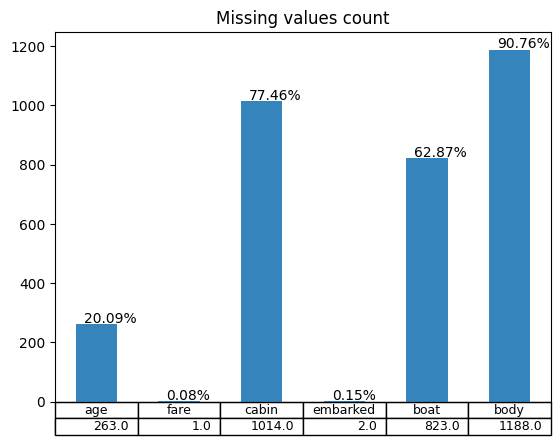

In [7]:
# Missing values

# number of rows
rows_length = df.shape[0]

# fields with missing value count
fields_with_nan_length = df.isna().sum().where(lambda x : x > 0).dropna()

ax = fields_with_nan_length \
.plot(kind='bar', alpha=0.9, title='Missing values count', table=True)
ax.xaxis.set_visible(False) # hide x axis labels


# write percentage on top of each bar
for i in ax.patches:
    ax.text(i.get_x()+.1, i.get_height()+5, \
            str(round((i.get_height()/rows_length)*100, 2))+'%')

In [8]:
df['age'].fillna(df['age'].mean(), inplace=True)

In [9]:
# Perform one-hot coding to represent categorical column as numerical column.

embarked = pd.get_dummies(df['embarked'])
sex = pd.get_dummies(df['sex'])
pclass = pd.get_dummies(df['pclass'])

df = pd.concat([df,embarked, sex, pclass], axis=1)
df.head()

,index,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,...,boat,body,C,Q,S,female,male,1,2,3
0,0,1,1,Allen. Miss. Elisabeth Walton,female,29.0000,0,0,24160,211.3375,...,2,NaN,0,0,1,1,0,1,0,0
1,1,1,1,Allison. Master. Hudson Trevor,male,0.9167,1,2,113781,151.5500,...,11,NaN,0,0,1,0,1,1,0,0
2,2,1,0,Allison. Miss. Helen Loraine,female,2.0000,1,2,113781,151.5500,...,None,NaN,0,0,1,1,0,1,0,0
3,3,1,0,Allison. Mr. Hudson Joshua Creighton,male,30.0000,1,2,113781,151.5500,...,None,135.0,0,0,1,0,1,1,0,0
4,4,1,0,Allison. Mrs. Hudson J C (Bessie Waldo Daniels),female,25.0000,1,2,113781,151.5500,...,None,NaN,0,0,1,1,0,1,0,0


In [10]:
# Drop unnecessary columns

df.drop(['boat','body','embarked','name','ticket','cabin','sex', 'index', 'pclass'],axis=1,inplace=True)
df

,survived,age,sibsp,parch,fare,C,Q,S,female,male,1,2,3
0,1,29.000000,0,0,211.3375,0,0,1,1,0,1,0,0
1,1,0.916700,1,2,151.5500,0,0,1,0,1,1,0,0
2,0,2.000000,1,2,151.5500,0,0,1,1,0,1,0,0
3,0,30.000000,1,2,151.5500,0,0,1,0,1,1,0,0
4,0,25.000000,1,2,151.5500,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0,14.500000,1,0,14.4542,1,0,0,1,0,0,0,1
1305,0,29.881135,1,0,14.4542,1,0,0,1,0,0,0,1
1306,0,26.500000,0,0,7.2250,1,0,0,0,1,0,0,1
1307,0,27.000000,0,0,7.2250,1,0,0,0,1,0,0,1


In [11]:
# Check for any NaN values

df.isnull().sum()

survived    0
age         0
sibsp       0
parch       0
fare        1
C           0
Q           0
S           0
female      0
male        0
1           0
2           0
3           0
dtype: int64

In [12]:
# Fill the na value using the mean of fares

df['fare'].fillna(df['fare'].mean(), inplace=True)

In [13]:
# Rename Columns

df = df.rename(columns={1:'First Class', 2:'Second Class', 3:'Third Class'})
df.head()

,survived,age,sibsp,parch,fare,C,Q,S,female,male,First Class,Second Class,Third Class
0,1,29.0000,0,0,211.3375,0,0,1,1,0,1,0,0
1,1,0.9167,1,2,151.5500,0,0,1,0,1,1,0,0
2,0,2.0000,1,2,151.5500,0,0,1,1,0,1,0,0
3,0,30.0000,1,2,151.5500,0,0,1,0,1,1,0,0
4,0,25.0000,1,2,151.5500,0,0,1,1,0,1,0,0


In [14]:
# Export the DataFrame as a CSV file

df.to_csv('/content/drive/MyDrive/titanic_clean.csv', index=False)

# __NEURAL NETWORK__

In [15]:
# Splitting the data into features and target

y = df['survived']
X = df.drop('survived', axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,stratify=y)

In [16]:
# Scaling using StandradScaler instances

# Create a StandardScaler instance
scaler = StandardScaler()
# Fit the StandardScaler. Only fit the train data to avoid data leakage.
X_scaler = scaler.fit(X_train)
# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [17]:
# Find the number of input variables.
# X_train_scaled[0] gives us the first row of the scaled train data

len(X_train_scaled[0])

12

In [18]:
# Defining the deep neural network and its number of input features and neurons for each hidden layer

input_features = len(X_train_scaled[0])
layer1 = 24
layer2 = 12

nn = tf.keras.models.Sequential()

# Add the first hidden layer
nn.add(tf.keras.layers.Dense(units=layer1, input_dim=input_features, activation='relu'))
# Add the second hidden layer
nn.add(tf.keras.layers.Dense(units=layer2, activation='relu'))
# Add the outer layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
# Check the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                312       
                                                                 
 dense_1 (Dense)             (None, 12)                300       
                                                                 
 dense_2 (Dense)             (None, 1)                 13        
                                                                 
Total params: 625
Trainable params: 625
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Compiling the model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs = 100)

Epoch 1/100
31/31 [==============================] - 1s 2ms/step - loss: 0.6472 - accuracy: 0.6707
Epoch 2/100
31/31 [==============================] - 0s 2ms/step - loss: 0.5671 - accuracy: 0.7696
Epoch 3/100
31/31 [==============================] - 0s 2ms/step - loss: 0.5114 - accuracy: 0.7819
Epoch 4/100
31/31 [==============================] - 0s 2ms/step - loss: 0.4782 - accuracy: 0.7849
Epoch 5/100
31/31 [==============================] - 0s 2ms/step - loss: 0.4602 - accuracy: 0.7900
Epoch 6/100
31/31 [==============================] - 0s 2ms/step - loss: 0.4488 - accuracy: 0.8012
Epoch 7/100
31/31 [==============================] - 0s 2ms/step - loss: 0.4420 - accuracy: 0.7992
Epoch 8/100
31/31 [==============================] - 0s 2ms/step - loss: 0.4356 - accuracy: 0.8053
Epoch 9/100
31/31 [==============================] - 0s 2ms/step - loss: 0.4311 - accuracy: 0.8063
Epoch 10/100
31/31 [==============================] - 0s 2ms/step - loss: 0.4289 - accuracy: 0.8073
Epoch 11/

In [20]:
# Evaluating the model using the test data

model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)

11/11 - 0s - loss: 0.4327 - accuracy: 0.8049 - 269ms/epoch - 24ms/step


In [21]:
# Generate a classification report

# Get predictions on the test set. Resulting y_pred are probability values that the input belongs to '1', or 'survival'.
y_pred = nn.predict(X_test_scaled)
# Convert probabilities to binary labels
y_pred = (y_pred>0.5)

report = classification_report(y_test, y_pred)
print(report)

11/11 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.79      0.93      0.85       203
           1       0.84      0.61      0.70       125

    accuracy                           0.80       328
   macro avg       0.81      0.77      0.78       328
weighted avg       0.81      0.80      0.80       328



# __NEURAL NETWORK OPTIMIZATION ATTEMPT__

In this attempt, our focus was on the dataset itself. In both the model creation and previous optimization attempts, we left the age feature as a continuous variable. However, for a simpler model learning, we transformed the age column into multiple categorical variables using one-hot coding. We attempted to optimize the model by changing the number of neurons, number of hidden layers, activation function, and number of epochs.

In [22]:
# Create a copy of the original df
df2 = df.copy()

# Transform the age column by categorizing the age values into different bins
age_bin = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]
age_label = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-65', '66-70', '71-75', '76-80']

df2['age group'] = pd.cut(df2['age'], bins=age_bin, labels=age_label, include_lowest=True)

In [23]:
df2.drop('age', inplace=True, axis=1)

In [24]:
# Transform the age column into categorical columns using one-hot coding

age_group_dummy = pd.get_dummies(df2['age group'])
df2 = pd.concat([df2, age_group_dummy], axis=1)
df2.drop('age group', inplace = True, axis=1)

In [25]:
df2.head()

,survived,sibsp,parch,fare,C,Q,S,female,male,First Class,...,31-35,36-40,41-45,46-50,51-55,56-60,61-65,66-70,71-75,76-80
0,1,0,0,211.3375,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,2,151.5500,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,1,2,151.5500,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1,2,151.5500,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,1,2,151.5500,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# Splitting the data into features and target

y2 = df2['survived']
X2 = df2.drop('survived', axis=1)
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,random_state=0,stratify=y2)

In [27]:
# Scaling using StandradScaler instances

# Create a StandardScaler instance
scaler = StandardScaler()
# Fit the StandardScaler. Only fit the train data to avoid data leakage.
X2_scaler = scaler.fit(X2_train)
# Scale the data
X2_train_scaled = X2_scaler.transform(X2_train)
X2_test_scaled = X2_scaler.transform(X2_test)

In [28]:
# Find the number of input variables.
# X_train_scaled[0] gives us the first row of the scaled train data

len(X2_train_scaled[0])

27

In [29]:
# Defining the deep neural network and its number of input features and neurons for each hidden layer

input_features2 = len(X2_train_scaled[0])
layer1_2 = 54
layer2_2 = 27

nn = tf.keras.models.Sequential()

# Add the first hidden layer
nn.add(tf.keras.layers.Dense(units=layer1_2, input_dim=input_features2, activation='relu'))
# Add the second hidden layer
nn.add(tf.keras.layers.Dense(units=layer2_2, activation='relu'))
# Add the outer layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
# Check the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 54)                1512      
                                                                 
 dense_4 (Dense)             (None, 27)                1485      
                                                                 
 dense_5 (Dense)             (None, 1)                 28        
                                                                 
Total params: 3,025
Trainable params: 3,025
Non-trainable params: 0
_________________________________________________________________


In [30]:
# Compiling the model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Train the model
fit_model = nn.fit(X2_train_scaled, y2_train, epochs = 100)

Epoch 1/100
31/31 [==============================] - 1s 2ms/step - loss: 0.6520 - accuracy: 0.6310
Epoch 2/100
31/31 [==============================] - 0s 2ms/step - loss: 0.5286 - accuracy: 0.7574
Epoch 3/100
31/31 [==============================] - 0s 2ms/step - loss: 0.4743 - accuracy: 0.7961
Epoch 4/100
31/31 [==============================] - 0s 2ms/step - loss: 0.4463 - accuracy: 0.8155
Epoch 5/100
31/31 [==============================] - 0s 2ms/step - loss: 0.4288 - accuracy: 0.8135
Epoch 6/100
31/31 [==============================] - 0s 2ms/step - loss: 0.4179 - accuracy: 0.8196
Epoch 7/100
31/31 [==============================] - 0s 2ms/step - loss: 0.4108 - accuracy: 0.8196
Epoch 8/100
31/31 [==============================] - 0s 2ms/step - loss: 0.4058 - accuracy: 0.8226
Epoch 9/100
31/31 [==============================] - 0s 2ms/step - loss: 0.3984 - accuracy: 0.8277
Epoch 10/100
31/31 [==============================] - 0s 2ms/step - loss: 0.3948 - accuracy: 0.8277
Epoch 11/

In [31]:
# Evaluating the model using the test data

model_loss, model_accuracy = nn.evaluate(X2_test_scaled,y2_test,verbose=2)

11/11 - 0s - loss: 0.4962 - accuracy: 0.7957 - 230ms/epoch - 21ms/step


In [32]:
# Generate a classification report

# Get predictions on the test set. Resulting y_pred are probability values that the input belongs to '1', or 'survival'.
y2_pred = nn.predict(X2_test_scaled)
# Convert probabilities to binary labels
y2_pred = (y2_pred>0.5)

report2 = classification_report(y2_test, y2_pred)
print(report2)

11/11 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       203
           1       0.82      0.60      0.69       125

    accuracy                           0.80       328
   macro avg       0.80      0.76      0.77       328
weighted avg       0.80      0.80      0.79       328



# __NEURAL NETWORK SUMMARY AND ANALYSIS:__

The neural network was the first of several models we used to predict the survival outcome of the Titanic tragedy. After cleaning and scaling the dataset, we used 13 input features to predict the outcome of passenger survival. The model comprised two hidden layers with 26 and 13 neurons, respectively, and 1 neuron in the outcome layer for binary classification. We used the ReLu function for the two hidden layers and the sigmoid function for the outcome layer. The model achieved an accuracy of approximately 80% and recall rate of 60%, making recall the better measure for predicting survivors.

We attempted to optimize the model by increasing the number of neurons and adding a third hidden layer, changing the activation function to Tanh, and increasing the number of epochs to 200. However, this resulted in overfitting. Conversely, attempts to simplify the learning process resulted in decreased accuracy and recall, indicating that the model was not learning enough. Unfortunately, any attempts at model optimization were futile, as the dataset was imbalanced, with far fewer survivors than fatalities.

# __LOGISTIC REGRESSION__

In [34]:
# Use the original DataFrame df and the original X and y values
# Split the data using train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0, stratify=y)

In [35]:
# Scaling using StandradScaler instances

# Create a StandardScaler instance
scaler = StandardScaler()
# Fit the StandardScaler. Only fit the train data to avoid data leakage.
X_scaler = scaler.fit(X_train)
# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [36]:
# Create and fit a model
log_regress = LogisticRegression(solver='lbfgs', random_state=0)
log_regress.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

In [37]:
# Predict using the model
y_predictions = log_regress.predict(X_test_scaled)
test_accuracy_test = accuracy_score(y_test, y_predictions)
print(f"Logistic Regression model's accuracy score is {round(test_accuracy_test, 2)}.")

Logistic Regression model's accuracy score is 0.82.


In [39]:
# Create a DataFrame of scaled test data to be used for Tableau visualization

# y_predictions_series = pd.Series(y_predictions)
# y_test = y_test.reset_index(drop=True)
# y_combined = pd.concat([y_test, y_predictions_series], axis=1)
# X_test_scaled_series = pd.DataFrame(X_test_scaled, columns=['age', 'sibsp', 'parch', 'fare', 'C', 'Q', 'S', 'female', 'male', 'First Class', 'Second Class', 'Third Class'])
# tableau_data = pd.concat([y_combined, X_test_scaled_series], axis=1)
# tableau_data = tableau_data.rename(columns={0:'Predicted Survival'})
# tableau_data.to_csv('/content/drive/MyDrive/titanic_tableau.csv', index=False)
# tableau_data.head()

In [40]:
# Generate a classification report for the model
log_regression_report = classification_report(y_test, y_predictions)
print(log_regression_report)

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       203
           1       0.80      0.70      0.74       125

    accuracy                           0.82       328
   macro avg       0.81      0.79      0.80       328
weighted avg       0.82      0.82      0.81       328



# __LOGISTIC REGRESSION SUMMARY AND ANALYSIS:__

The model accuracy is approximately 82%, and the precision of both the dead and the survivors is above 80%. The recall rate of those who died is high, at around 89%, while the recall rate of the survivors is around 70%, which is much higher than that generated by the neural network.

While neural networks can achieve higher accuracy rates than logistic regression, logistic regression can sometimes perform better than neural networks in terms of recall rate. One reason for this is that logistic regression models tend to be more interpretable and have a more transparent decision-making process than neural networks. Additionally, logistic regression models are less prone to overfitting than neural networks, which can result in a better recall rate.

# __RANDOM FOREST__

In [41]:
# Splitting the data into train and test sets
X_forest_train, X_forest_test, y_forest_train, y_forest_test = train_test_split(X,y,random_state=0,stratify=y)

In [42]:
# Creating StandardScaler instance
scaler = StandardScaler()
# Fitting Standard Scaler
X_forest_scaler = scaler.fit(X_forest_train)
# Scaling the data
X_forest_train_scaled = X_forest_scaler.transform(X_forest_train)
X_forest_test_scaled = X_forest_scaler.transform(X_forest_test)

In [43]:
# Create a random forest classifier and then fit and predict
rf_model = RandomForestClassifier(n_estimators=500, random_state=0)
rf_model = rf_model.fit(X_forest_train_scaled, y_forest_train)
predictions_forest = rf_model.predict(X_forest_test_scaled)

In [44]:
# Generate the accuracy score and the classification report
accuracy_score_forest = accuracy_score(y_forest_test, predictions_forest)
print(f"Random Forest model's accuracy score is {round(accuracy_score_forest, 2)}.")
print(classification_report(y_forest_test, predictions_forest))

Random Forest model's accuracy score is 0.8.
              precision    recall  f1-score   support

           0       0.80      0.90      0.84       203
           1       0.79      0.63      0.70       125

    accuracy                           0.80       328
   macro avg       0.79      0.76      0.77       328
weighted avg       0.80      0.80      0.79       328



# __RANDOM FOREST SUMMARY AND ANALYSIS:__

The random forest model has an accuracy score of around 80%, with precision for both the dead and the survivors around 80%. The recall rate for the dead is around 90%, while the recall rate for the survivors is around 62%, which is lower than that of logistic regression and similar to that of the neural network.